1) Data Set details

In [ ]:
import pandas as pd

data = pd.read_excel("/content/As+P bez O po LB.xlsx")

2) Prepare data

In [ ]:
# time columns as independent variable
X = data["czas [h]"]

# remove from dataset redundant columns and independent variable
Y = data.loc[:, ~data.columns.str.startswith(("Unnamed:", "czas"))]

3) Plot example of the data

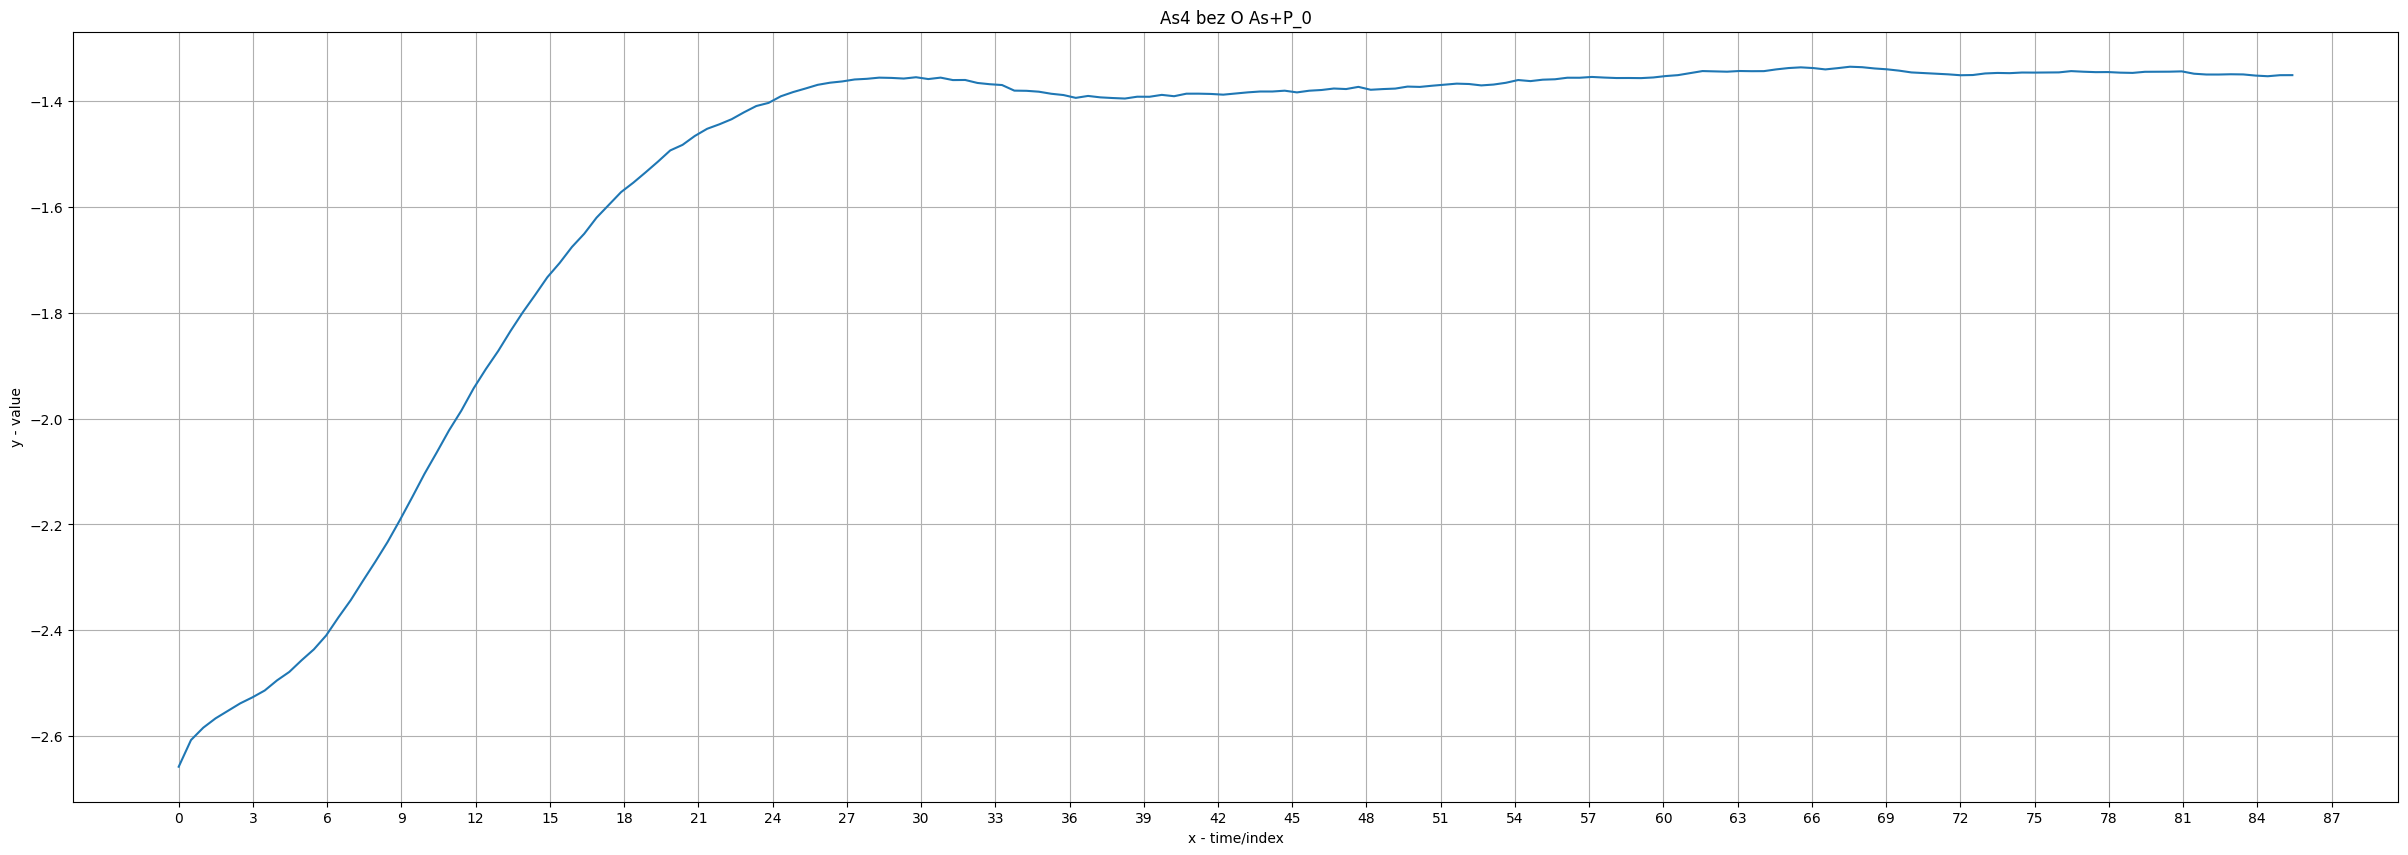

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot(x, y, columnName):
  plt.xticks(np.arange(0, len(x), 3))
  plt.rcParams["figure.figsize"] = (30,10)
  plt.grid()
  plt.title(columnName)
  plt.xlabel('x - time/index')
  plt.ylabel('y - value')
  plt.plot(x, y)
  plt.show()


columnName = "As4 bez O As+P_0"
Y1 = Y[columnName]
plot(X, Y1, columnName)

4) Set Indexes with catching errors

In [ ]:
def textToNumber(text):
  number = -1
  try:
    number = int(text)
  except Exception:
    print("incorrect value, required number")
  return number

def getBeginIndex(maxNumber):
  index = 0
  while True:
    index = input("Index begin = ")
    index = textToNumber(index)
    if (index < maxNumber and index >= 0):
      break
    else:
      print("Begin index have to greater than 0 and less than length of rows in column")
  return index

def getEndIndex(maxNumber, beginIndex):
  index = 0
  while True:
    index = input("Index end = ")
    index = textToNumber(index)
    if (index <= maxNumber and index > beginIndex):
      break
    else:
      print("End index have to greater than begin index and less than length of rows in column")
  return index

numberOfIndexes = len(X)
beginIndex = getBeginIndex(numberOfIndexes)
endIndex = getEndIndex(numberOfIndexes, beginIndex)
print("\nIndex Begin = ", beginIndex, "\nIndex End = ", endIndex)

Index begin = 3
Index end = k
incorrect value, required number
End index have to greater than begin index and less than length of rows in column
Index end = 8

Index Begin =  3 
Index End =  8


5) Calcualte Alpha and R2

In [ ]:
from sklearn.linear_model import LinearRegression

def calculateAlfaAndR2(Xdata, Ydata, begin, end):
  x = Xdata[begin:end]
  y = Ydata[begin:end]

  regModel = LinearRegression().fit(x.to_frame(), y)
  r2 = regModel.score(x.to_frame(), y)
  alfa = regModel.coef_[0]

  print("\t alfa =", alfa)
  print("\t r2 =", r2)
  return alfa, r2

#test
xtest = pd.Series([1, 2, 3, 4, 5])
ytest = pd.Series([2, 4, 6, 8, 10])
alfa, r2 = calculateAlfaAndR2(xtest, ytest, 0, 5)
assert alfa == 2
assert r2 == 1

	 alfa = 2.0
	 r2 = 1.0


# Project



 As4 bez O As+P_0


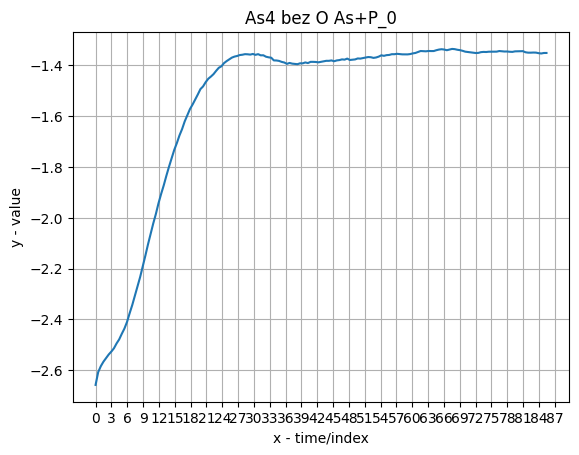

Index begin = 2
Index end = 8
	 alfa = 0.027855345658815728
	 r2 = 0.9952068167911464
make correct? [y/n]:n


 As4 bez O As+P_0,25


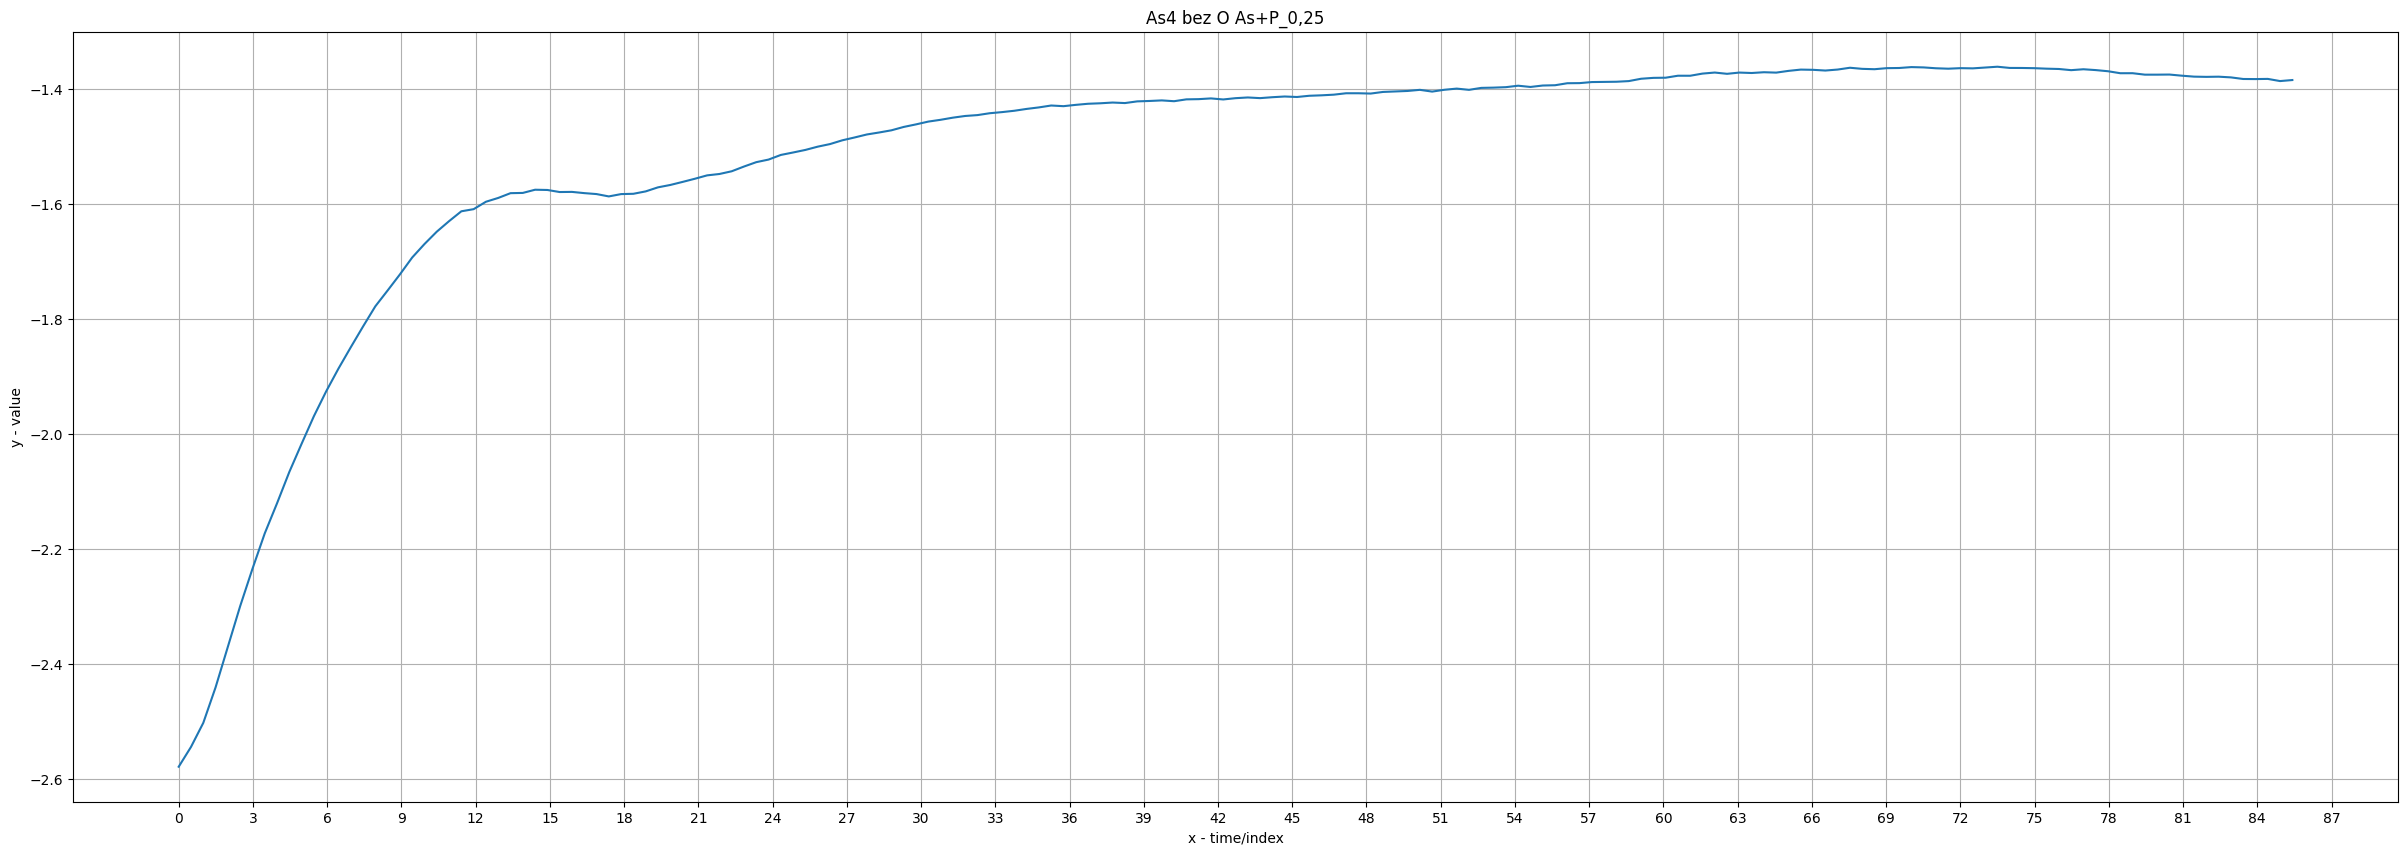

Index begin = 5
Index end = 1
End index have to greater than begin index and less than length of rows in column
Index end = 10
	 alfa = 0.11707217235146507
	 r2 = 0.9978825392187626
make correct? [y/n]:n


 As4 bez O As+P_0,5


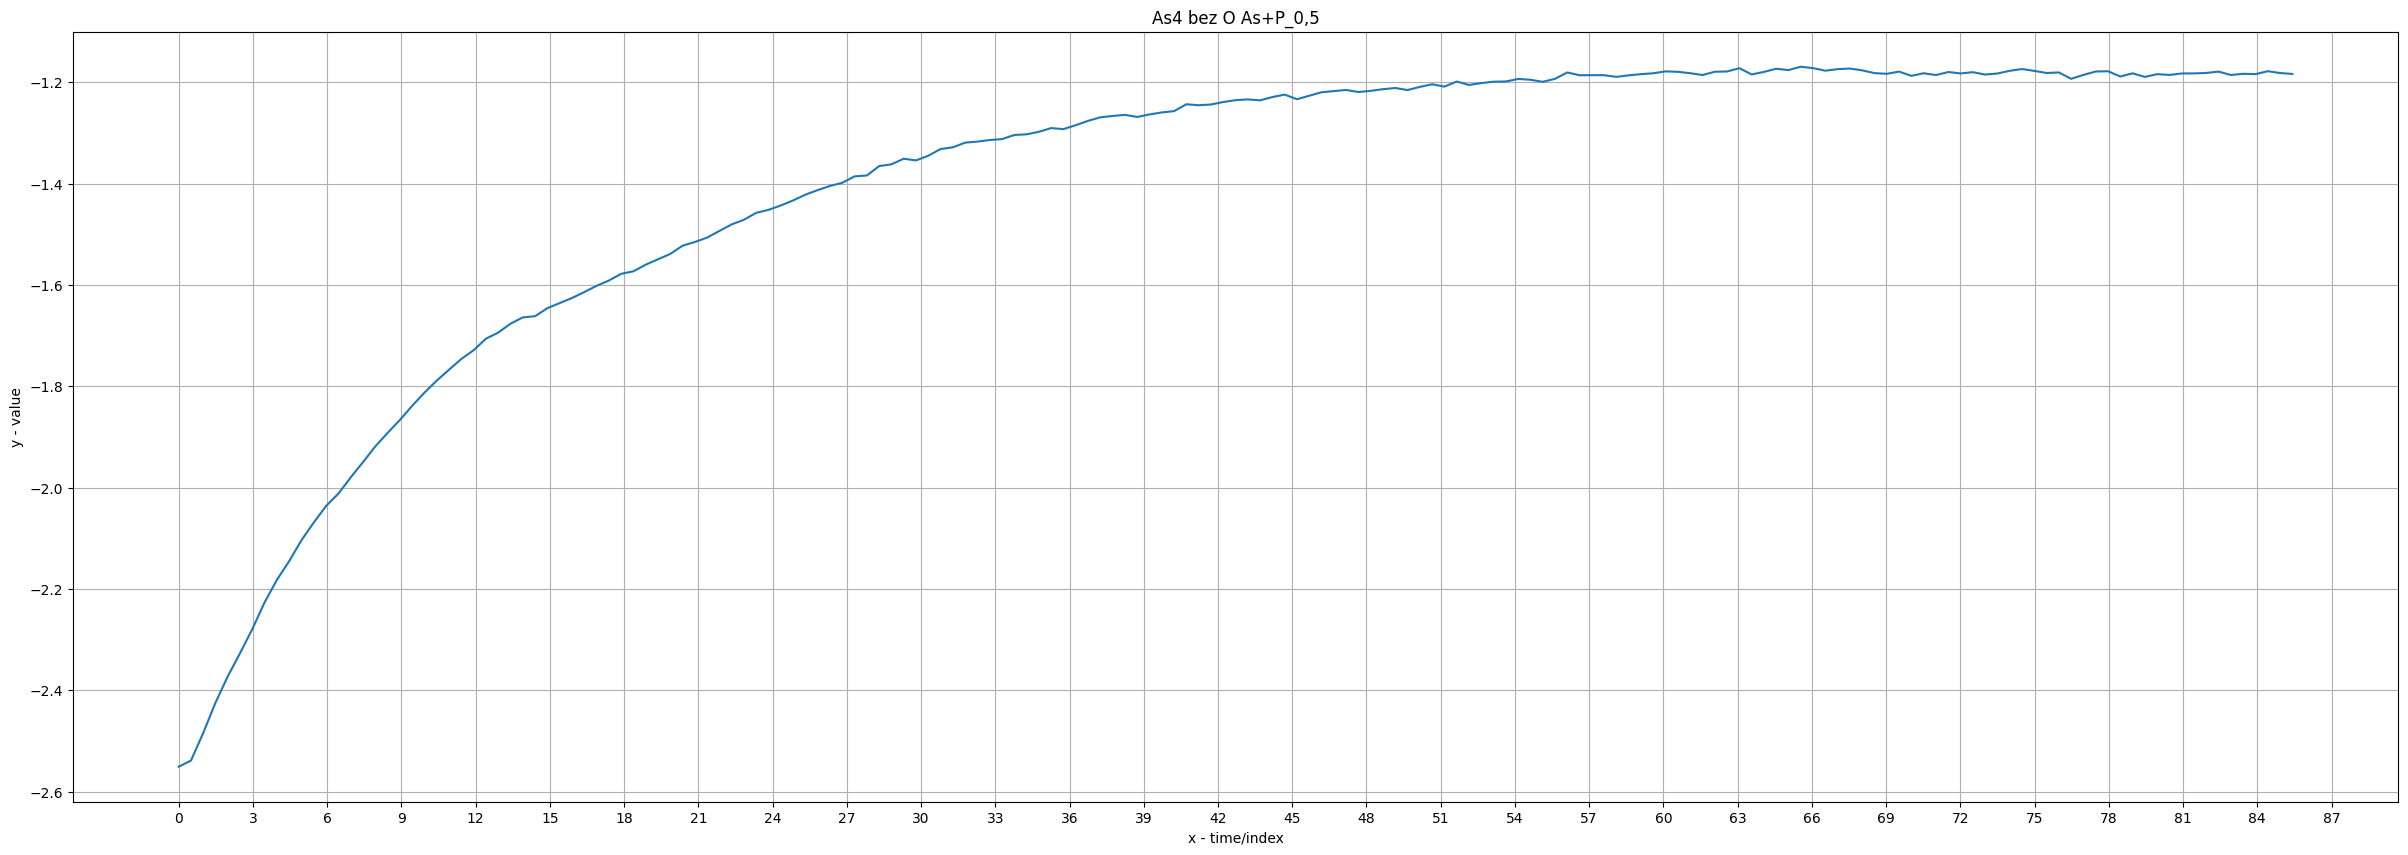

Index begin = 2
Index end = 8
	 alfa = 0.10190721949286408
	 r2 = 0.9982766043364957
make correct? [y/n]:n

 File with results was saved in: /content/extracted_As+P bez O po LB.csv


In [ ]:
import pandas as pd # do czytania i zapisywania plikow xml/csv
import numpy as np # do obliczeń i działania na zbiorach
import matplotlib.pyplot as plt # do rysowania wykresów
from sklearn.linear_model import LinearRegression # do obliczenia r2 i alfa
import time # do wymuszenia zatrzymania na sekundę - sleep(1)

def plot(x, y, columnName):
  plt.xticks(np.arange(0, len(x), 3))
  plt.rcParams["figure.figsize"] = (30,10)
  plt.grid()
  plt.title(columnName)
  plt.xlabel('x - time/index')
  plt.ylabel('y - value')
  plt.plot(x, y)
  plt.show()
  time.sleep(1) # because of problem of connect plotting with input functions - https://stackoverflow.com/questions/29189536/ipython-jupyter-input-prevents-plot-showing

def textToNumber(text):
  number = -1
  try:
    number = int(text)
  except Exception:
    print("incorrect value, required number")
  return number

def getBeginIndex(maxNumber):
  index = 0
  while True:
    index = input("Index begin = ")
    index = textToNumber(index)
    if (index < maxNumber and index >= 0):
      break
    else:
      print("Begin index have to greater than 0 and less than length of rows in column")
  return index

def getEndIndex(maxNumber, beginIndex):
  index = 0
  while True:
    index = input("Index end = ")
    index = textToNumber(index)
    if (index <= maxNumber and index > beginIndex):
      break
    else:
      print("End index have to greater than begin index and less than length of rows in column")
  return index

def calculateAlfaAndR2(Xdata, Ydata, begin, end):
  x = Xdata[begin:end]
  y = Ydata[begin:end]
  regModel = LinearRegression().fit(x.to_frame(), y)
  r2 = regModel.score(x.to_frame(), y)
  alfa = regModel.coef_[0]
  print("\t alfa =", alfa)
  print("\t r2 =", r2)
  return alfa, r2

########################
### główny algorytm ####
########################

outputs = [["column_name", "index_begin", "index_end", "r2", "alfa"]]

data = pd.read_excel("/content/As+P bez O po LB.xlsx")
X = data["czas [h]"]
Y = data.loc[:, ~data.columns.str.startswith(("Unnamed:", "czas"))]

for columnName in Y.columns:
  print("\n\n", columnName)
  YForColumn = Y[columnName]
  plot(X, YForColumn, columnName)
  while True:
    numberOfIndexes = len(YForColumn)
    beginIndex= getBeginIndex(numberOfIndexes)
    endIndex = getEndIndex(numberOfIndexes, beginIndex)
    alfa, r2 = calculateAlfaAndR2(X, YForColumn, beginIndex, endIndex)
    repeat = input("make correct? [y/n]:")
    if repeat == "n":
      outputs.append([columnName, beginIndex, endIndex, r2, alfa])
      break

outpuFile =  "/content/extracted_As+P bez O po LB.csv"
pd.DataFrame(outputs).to_csv(outpuFile, index=False)
print("\n File with results was saved in:", outpuFile)